In [1]:
## this is all the import that is require to 
%matplotlib inline
from binance.client import Client
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf


C:\Users\athai1\Anaconda3\envs\tf_gpu\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [31]:
##This is the key and secret key in order to accesss the client for Binance.
## After access to binance we have to define the interval for that client and how the user want the data to look.
## for more infor: https://github.com/binance-exchange/binance-official-api-docs/blob/master/rest-api.md
##after having those data create a dataFrame using pandas

In [9]:
key= "Ur-key-here"
Secretkey= "ur-secretkey-here"
client = Client(key,Secretkey)
BTC = client.get_historical_klines('BTCUSDT', interval = Client.KLINE_INTERVAL_30MINUTE,start_str="4 year ago UTC")
BTC = pd.DataFrame(BTC, columns=['open_time','open','high','low','close','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','ignore'])

In [10]:
BTC.head() #checking the head of the bitcoin

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1502942400000,4261.48000000,4280.56000000,4261.32000000,4261.45000000,11.30892600,1502944199999,48224.75400837,49,3.93617400,16793.03995768,7922.57993329
1,1502944200000,4280.00000000,4313.62000000,4267.99000000,4308.83000000,35.87208300,1502945999999,154141.38438467,122,31.22432900,134159.43798536,7887.63551305
2,1502946000000,4308.83000000,4328.69000000,4304.31000000,4320.00000000,21.04864800,1502947799999,90864.29252042,73,19.39657000,83746.08374208,7863.87118389
3,1502947800000,4320.00000000,4320.00000000,4291.37000000,4315.32000000,2.18626800,1502949599999,9440.53104707,29,2.05150100,8862.19598628,8039.26240152
4,1502949600000,4330.29000000,4330.29000000,4309.37000000,4311.02000000,3.56627700,1502951399999,15409.76133301,14,2.30207700,9951.67338501,8049.59266729


In [11]:
BTC['open_time'] = pd.to_datetime(BTC['open_time'], unit = 'ms') ## convert open time frame (datetime in ms)
BTC.set_index('open_time', inplace = True)
BTC.head(5)

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
open_time,,,,,,,,,,,
2017-08-17 04:00:00,4261.48000000,4280.56000000,4261.32000000,4261.45000000,11.30892600,1502944199999,48224.75400837,49,3.93617400,16793.03995768,7922.57993329
2017-08-17 04:30:00,4280.00000000,4313.62000000,4267.99000000,4308.83000000,35.87208300,1502945999999,154141.38438467,122,31.22432900,134159.43798536,7887.63551305
2017-08-17 05:00:00,4308.83000000,4328.69000000,4304.31000000,4320.00000000,21.04864800,1502947799999,90864.29252042,73,19.39657000,83746.08374208,7863.87118389
2017-08-17 05:30:00,4320.00000000,4320.00000000,4291.37000000,4315.32000000,2.18626800,1502949599999,9440.53104707,29,2.05150100,8862.19598628,8039.26240152
2017-08-17 06:00:00,4330.29000000,4330.29000000,4309.37000000,4311.02000000,3.56627700,1502951399999,15409.76133301,14,2.30207700,9951.67338501,8049.59266729


In [12]:
BTC['close']=BTC['close'].astype(float) ## convert closing time to a float

##year2=BTC.loc['1524994200000':'1556532000000']
##year1=BTC.loc['1493458200000','1524996000000']


Text(0.5, 1.0, 'price in dollars vs date')

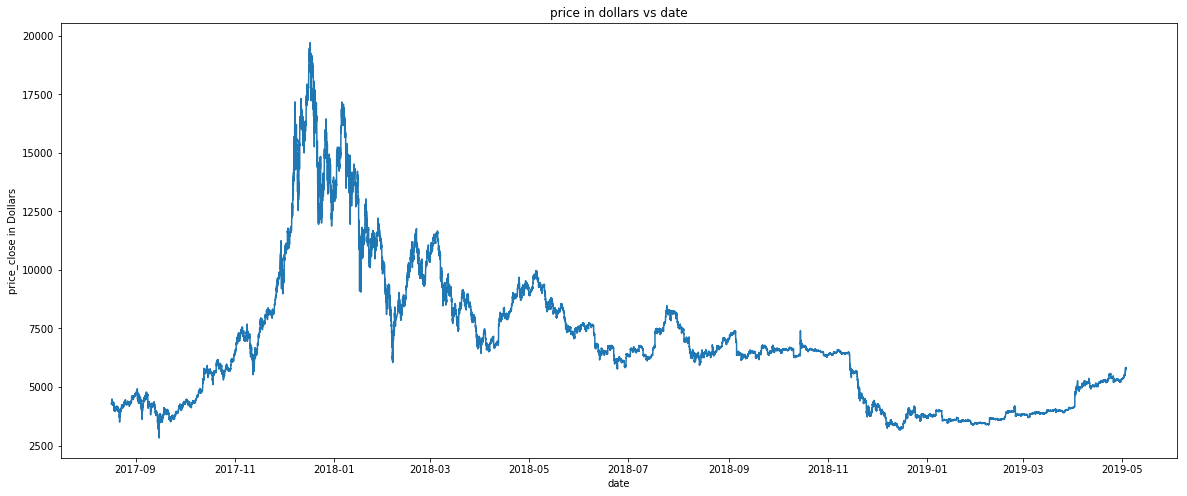

In [13]:
plt.figure(figsize=(20,8))
plt.plot(BTC["close"])
plt.xlabel("date")
plt.ylabel("price_close in Dollars")
plt.title("price in dollars vs date")


In [14]:
##Normalized the data to check if there are any correlation
def norm(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

In [ ]:
# i want to check is the first two years if there are any correlation between the season of AUGUST TO APRIL.By using those
#datase

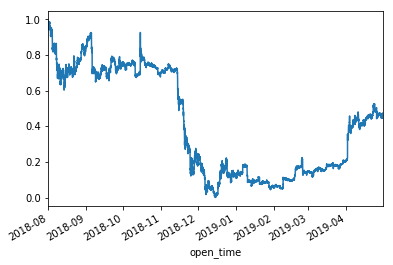

In [15]:
first=norm(BTC['2018-08':'2019-04']['close']) ## year 08-2018 to 04-2019 data
second=norm(BTC['2017-08':'2018-04']['close']) ## year 08-2017 to 04-2018 data
first.plot()


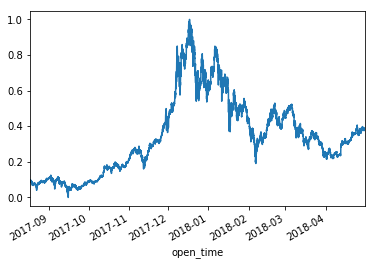

In [16]:
second.plot()

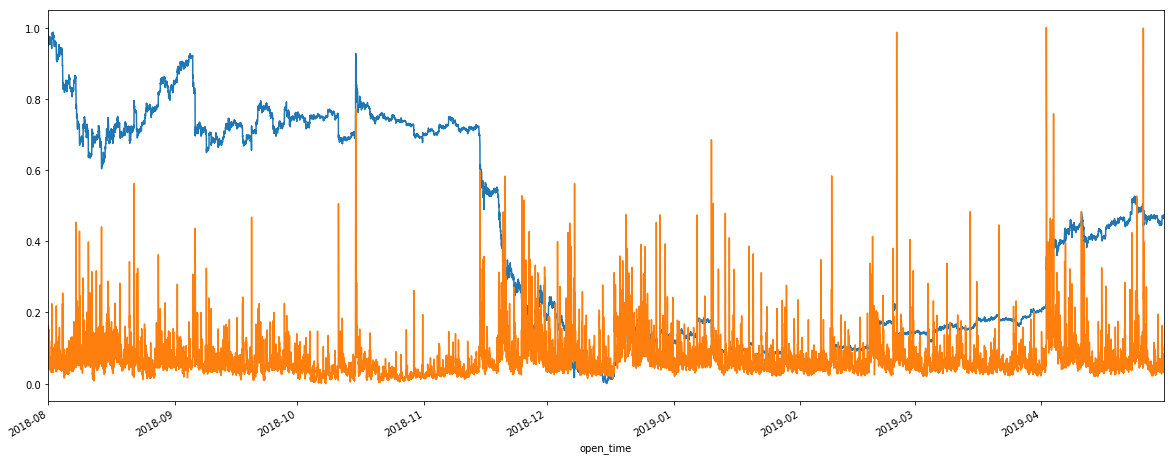

In [21]:
## check if there are anycorrelation between  closing time and number of trades
plt.figure(figsize=(20,8))
first=norm(BTC['2018-08':'2019-04']['close'])
second=norm(BTC['2018-08':'2019-04']['number_of_trades'])
first.plot()
second.plot()

In [ ]:
##creating data for setting up tensorflow scaler defines the scaler meaning i want to transform the data through normalization

In [22]:
data = BTC.iloc[:,3:4].astype(float).values
scaler = MinMaxScaler()
data=scaler.fit_transform(data)


In [23]:
# check the shape
data.shape
data

array([[0.08534592],
       [0.08815122],
       [0.08881258],
       ...,
       [0.17567128],
       [0.17656355],
       [0.17627816]])

In [25]:
##This is my shift step and that defines only 1 day since each column defines as 30 mins so therefore i multiply this 
#by shift_days* 24 hours * 2(2*30 is equal to one hour)
shift_days = 1
shift_steps = shift_days*24*2 


In [26]:
#80-20 ratio split from training_set and test set since python will not account the interval of [interval] into acount in 
#train_set

interval = 17449*8/10
interval=int(interval)

In [34]:
train_set = data[:interval]
test_set = data[interval:]
x_train = train_set[0:len(train_set)-shift_steps]
y_train = train_set[shift_steps:len(train_set)]
x_test = test_set[0:len(test_set)-shift_steps]
y_test = test_set[shift_steps:len(test_set)]
X_train = np.reshape(x_train,(len(x_train),1,x_train.shape[1]))
X_test = np.reshape(x_test,(len(x_test),1,x_test.shape[1]))

In [28]:
## THis is creating  model on tensorflow what I will be using is long short term memory network for Sequential
## for more information: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
## in order to create a model we need are two main a sequential and complie
## for the sequential we need are three layers
## for compile we need loss optimizer and metrics mse= mean squared error mae = mean absolute error
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(256,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])),
        tf.keras.layers.LSTM(256),
        tf.keras.layers.Dense(1)
    ])
    model.compile(
        loss='mse',
        optimizer='adam',
        metrics=['mae','mse']
    )
    return model

In [35]:
#building the model to train
model = build_model()

In [36]:
#check the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 256)            264192    
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


In [37]:
#check a little prediction from 0-9 of train set

example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.00039492],
       [-0.00040791],
       [-0.00041097],
       [-0.00040969],
       [-0.00040851],
       [-0.00041216],
       [-0.00040312],
       [-0.00041919],
       [-0.00042213],
       [-0.00042212]], dtype=float32)

In [38]:
#train the data with the 
model.fit(X_train,y_train,epochs=50,batch_size=16,shuffle=False)


Epoch 1/50
13911/13911 [==============================] - 8s 583us/sample - loss: 0.0025 - mean_absolute_error: 0.0351 - mean_squared_error: 0.0025
Epoch 2/50
13911/13911 [==============================] - 7s 519us/sample - loss: 0.0032 - mean_absolute_error: 0.0409 - mean_squared_error: 0.0032
Epoch 3/50
13911/13911 [==============================] - 7s 511us/sample - loss: 0.0033 - mean_absolute_error: 0.0428 - mean_squared_error: 0.0033
Epoch 4/50
13911/13911 [==============================] - 7s 511us/sample - loss: 0.0036 - mean_absolute_error: 0.0441 - mean_squared_error: 0.0036
Epoch 5/50
13911/13911 [==============================] - 7s 509us/sample - loss: 0.0035 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0035
Epoch 6/50
13911/13911 [==============================] - 7s 508us/sample - loss: 0.0037 - mean_absolute_error: 0.0450 - mean_squared_error: 0.0037
Epoch 7/50
13911/13911 [==============================] - 7s 517us/sample - loss: 0.0038 - mean_absolute_error: 

In [39]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(y_test)

In [ ]:
# creating a plot to compare the actual price with predicted price. 
#this defines how fast our model is learning 

Text(0, 0.5, 'price')

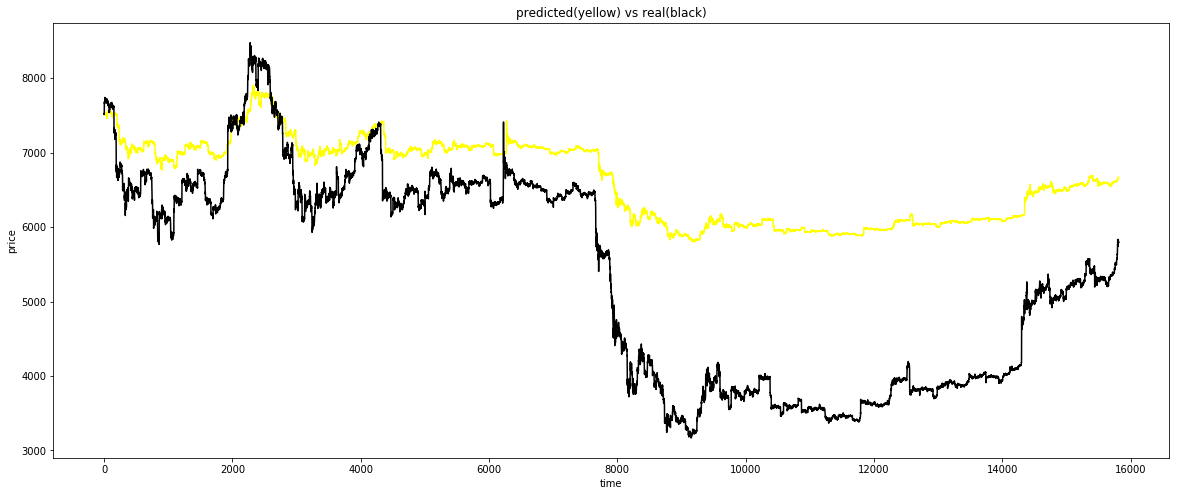

In [41]:
plt.figure(figsize=(20,8))
plt.plot(predicted_price, color ='yellow', label = 'predicted price BTC')
plt.plot(real_price, color = 'black', label ='real price of BTC')
plt.title('predicted(yellow) vs real(black)')
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
## as you can see even the time step of only 1 day could change the entire data set of changes
## in order to make a better prediction maybe I could use twitter data and check positive or negative and put this into our model
